In [33]:
# Script to install the required packages for the stock market analysis
#!pip install yfinance
#!pip install pandas
#!pip install matplotlib
#!pip install matplotlib mplfinance
#!pip install seaborn


In [34]:
# set the library
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import mplfinance as mpf
import seaborn as sns

In [35]:
# List of major tech stocks to analyze
tech_stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "AMD", "INTC", "NFLX"]

In [36]:
# Dictionary to store the data
stocks_data = {}

# Loop through each stock in the list
for ticker in tech_stocks:
    stock = yf.Ticker(ticker)
    data = stock.history(period="10y")
    data['Stock'] = ticker  # Add a new column for the stock name
    # Keep only the date part of the datetime
    data.reset_index(inplace=True)  # Ensure 'Date' is a column, not an index
    data['Date'] = data['Date'].dt.date
    stocks_data[ticker] = data

# Optional: Convert the dictionary to a DataFrame for better visualization
all_stocks_df = pd.concat(stocks_data)
all_stocks_df


Date         Open         High          Low        Close  \
AAPL 0     2015-02-23    29.037066    29.702581    28.956668    29.702581   
     1     2015-02-24    29.689185    29.836582    29.293894    29.517221   
     2     2015-02-25    29.380982    29.389917    28.619434    28.762363   
     3     2015-02-26    28.762367    29.226889    28.275515    29.126392   
     4     2015-02-27    29.032592    29.159891    28.639537    28.688669   
...               ...          ...          ...          ...          ...   
NFLX 2511  2025-02-14  1044.949951  1064.500000  1041.689941  1058.599976   
     2512  2025-02-18  1060.000000  1062.000000  1023.750000  1035.849976   
     2513  2025-02-19  1035.180054  1045.000000  1024.510010  1043.329956   
     2514  2025-02-20  1042.000000  1045.000000  1015.590027  1024.540039   
     2515  2025-02-21  1029.420044  1032.380005   999.390015  1003.150024   

              Volume  Dividends  Stock Splits Stock  
AAPL 0     283896400        0.0           0.0  AAPL  
     1     276912400        0.0           0.0  AAPL  
     2     298846800        0.0           0.0  AAPL  
     3     365150000        0.0           0.0  AAPL  
     4     248059200        0.0           0.0  AAPL  
...              ...        ...           ...   ...  
NFLX 2511    3145400        0.0           0.0  NFLX  
     2512    4229300        0.0           0.0  NFLX  
     2513    2600000        0.0           0.0  NFLX  
     2514    3111800        0.0           0.0  NFLX  
     2515    3731600        0.0           0.0  NFLX  

[25160 rows x 9 columns]

In [37]:
# Reset the index to separate the date into its own column
all_stocks_df.reset_index(inplace=True)


In [38]:
# Rename 'level_0' to 'Stock'
all_stocks_df.rename(columns={'level_0': 'Stock'}, inplace=True)

# Rearrange columns to have 'Date' and 'Stock' as the first two columns
columns_to_keep = ['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']
all_stocks_df = all_stocks_df[columns_to_keep]

# Display the first few rows of the DataFrame
print(all_stocks_df.head())

  Stock Stock        Date       Open       High        Low      Close  \
0  AAPL  AAPL  2015-02-23  29.037066  29.702581  28.956668  29.702581   
1  AAPL  AAPL  2015-02-24  29.689185  29.836582  29.293894  29.517221   
2  AAPL  AAPL  2015-02-25  29.380982  29.389917  28.619434  28.762363   
3  AAPL  AAPL  2015-02-26  28.762367  29.226889  28.275515  29.126392   
4  AAPL  AAPL  2015-02-27  29.032592  29.159891  28.639537  28.688669   

      Volume  
0  283896400  
1  276912400  
2  298846800  
3  365150000  
4  248059200  


In [39]:
# Remove duplicate 'Stock' column
all_stocks_df = all_stocks_df.loc[:, ~all_stocks_df.columns.duplicated()]

# Dictionary to store individual stock DataFrames
individual_stock_dfs = {}

# Directory to save the CSV files
output_dir = 'stock_data'
os.makedirs(output_dir, exist_ok=True)

# Loop through each stock and create separate DataFrames
for ticker in tech_stocks:
    individual_stock_dfs[ticker] = all_stocks_df[all_stocks_df['Stock'] == ticker]

    # Save each DataFrame to a CSV file (optional)
    individual_stock_dfs[ticker].to_csv(os.path.join(output_dir, f'{ticker}_stock_data.csv'), index=False)

# Example: Access the DataFrame for Google (GOOGL)
print(individual_stock_dfs['GOOGL'].head())

      Stock        Date       Open       High        Low      Close    Volume
5032  GOOGL  2015-02-23  26.852658  26.867603  26.503922  26.653379  32906000
5033  GOOGL  2015-02-24  26.481501  26.872583  26.454100  26.835220  28406000
5034  GOOGL  2015-02-25  26.824760  27.379249  26.803336  27.267654  40836000
5035  GOOGL  2015-02-26  27.188440  27.905341  27.156056  27.863493  54032000
5036  GOOGL  2015-02-27  27.806698  28.368164  27.750901  28.029890  68328000


In [43]:
# Function to calculate investment returns
def calculate_returns(initial_investment, ticker):
    data = individual_stock_dfs[ticker]
    start_price = data.iloc[0]['Close']
    end_price = data.iloc[-1]['Close']
    returns = (end_price / start_price) * initial_investment
    return returns

# Example usage
initial_investment = 1000  # Example initial investment amount in USD
for ticker in tech_stocks:
    returns = calculate_returns(initial_investment, ticker)
    print(f"If you invested ${initial_investment} in {ticker} 10 years ago, you would have ${returns:.2f} today.")

If you invested $1000 in AAPL 10 years ago, you would have $8266.96 today.
If you invested $1000 in MSFT 10 years ago, you would have $10691.42 today.
If you invested $1000 in GOOGL 10 years ago, you would have $6740.61 today.
If you invested $1000 in AMZN 10 years ago, you would have $11394.75 today.
If you invested $1000 in TSLA 10 years ago, you would have $24438.12 today.
If you invested $1000 in NVDA 10 years ago, you would have $252751.70 today.
If you invested $1000 in META 10 years ago, you would have $8703.21 today.
If you invested $1000 in AMD 10 years ago, you would have $36222.22 today.
If you invested $1000 in INTC 10 years ago, you would have $953.33 today.
If you invested $1000 in NFLX 10 years ago, you would have $14882.27 today.


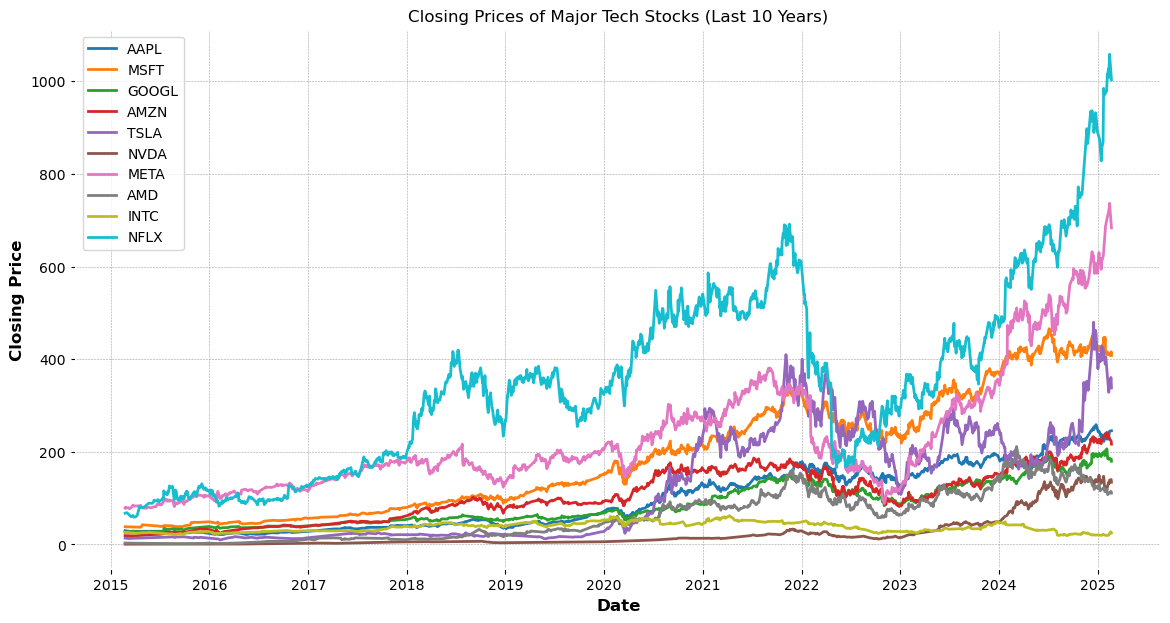

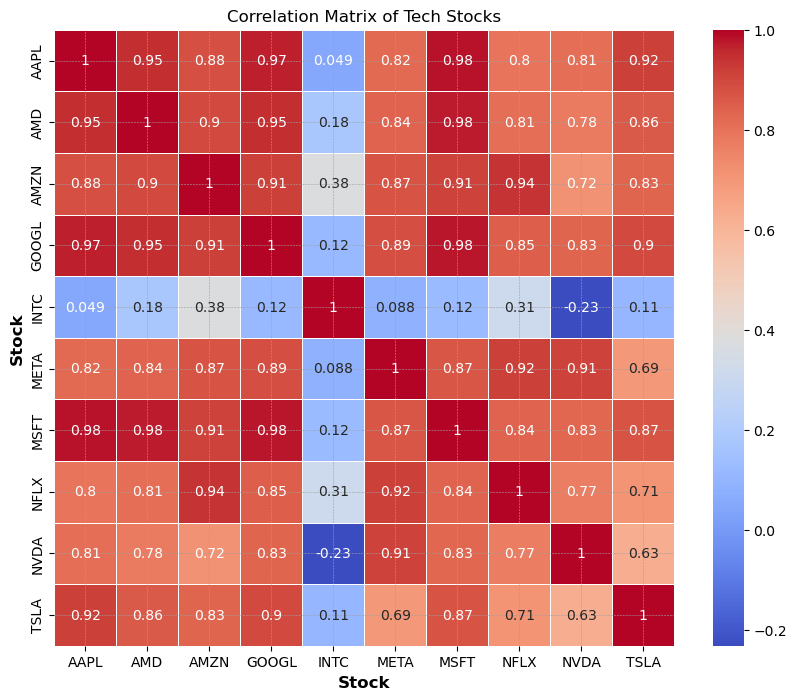

In [40]:
# Calculate summary statistics for each stock
summary_stats = all_stocks_df.groupby('Stock').describe()

# Plot closing prices over time
plt.figure(figsize=(14, 7))
for ticker in tech_stocks:
    plt.plot(individual_stock_dfs[ticker]['Date'], individual_stock_dfs[ticker]['Close'], label=ticker)
plt.title('Closing Prices of Major Tech Stocks (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot a correlation matrix
correlation_matrix = all_stocks_df.pivot_table(index='Date', columns='Stock', values='Close').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Tech Stocks')
plt.show()

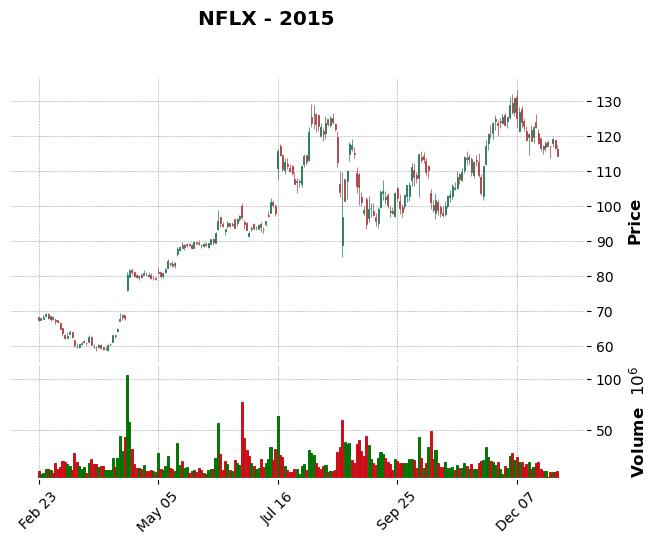

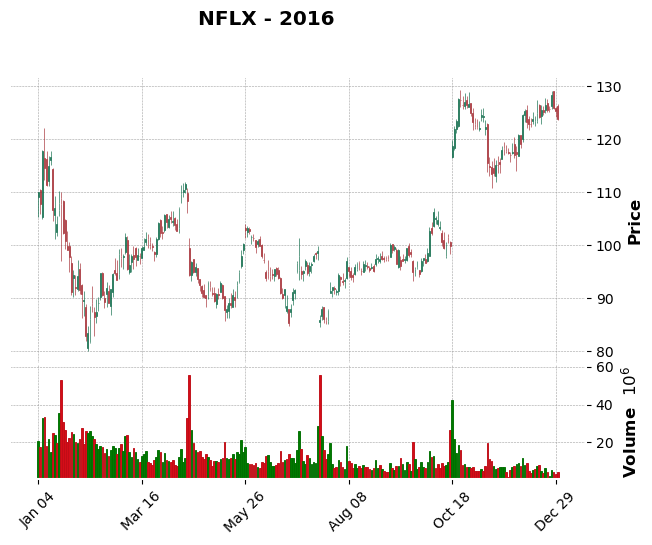

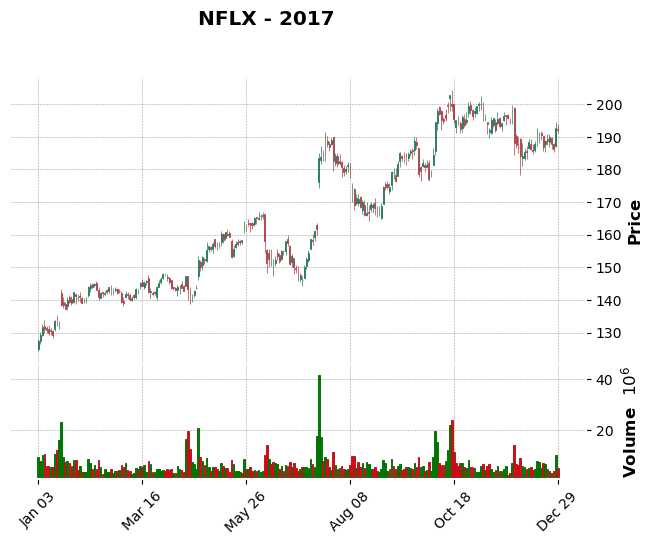

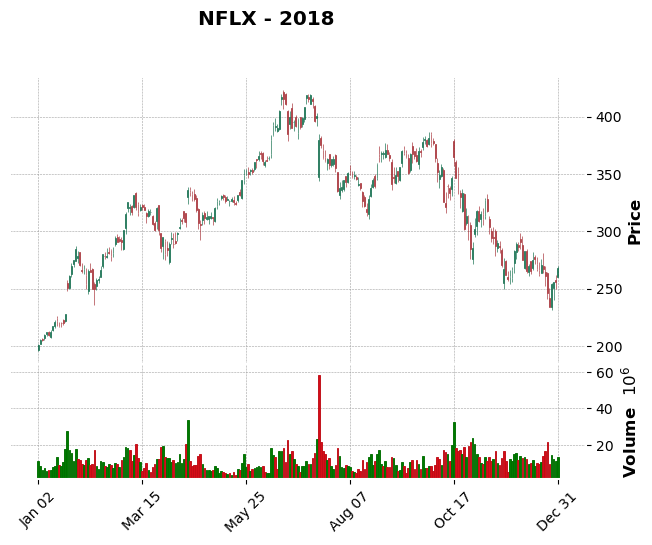

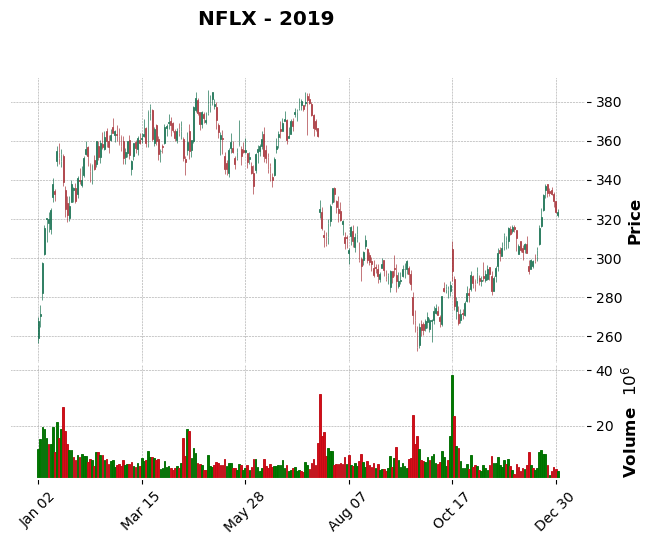

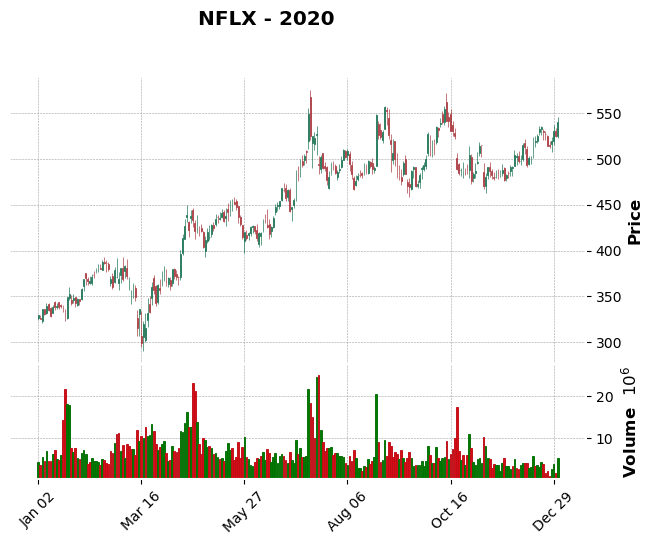

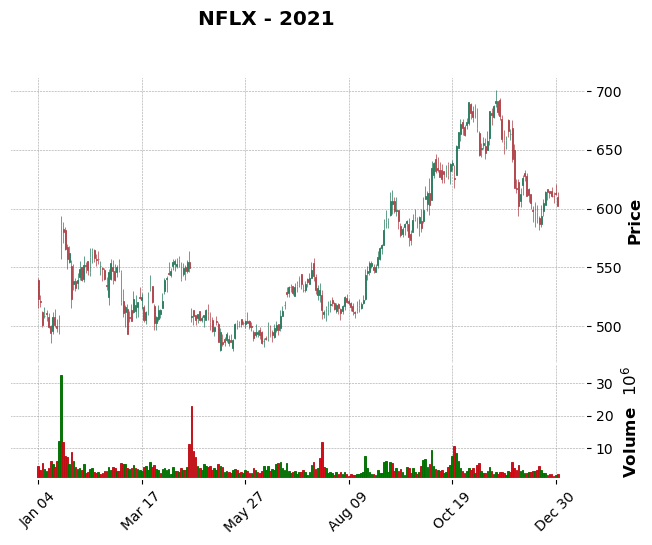

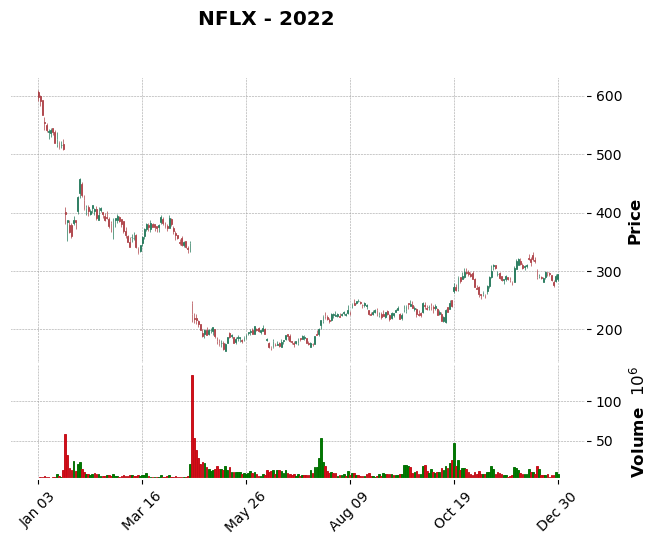

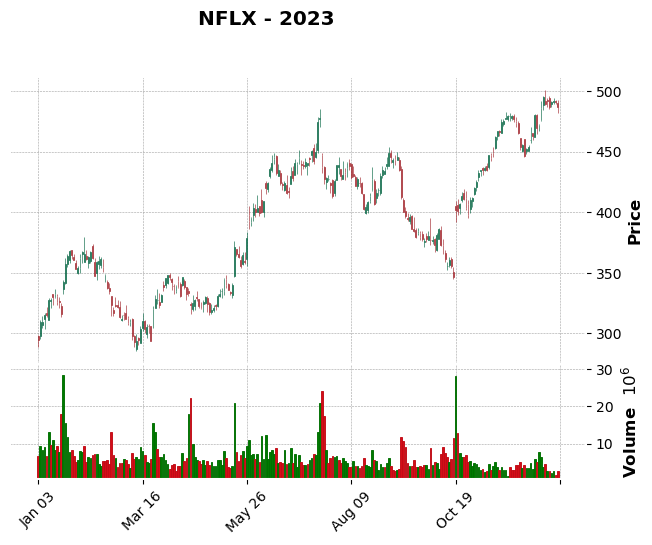

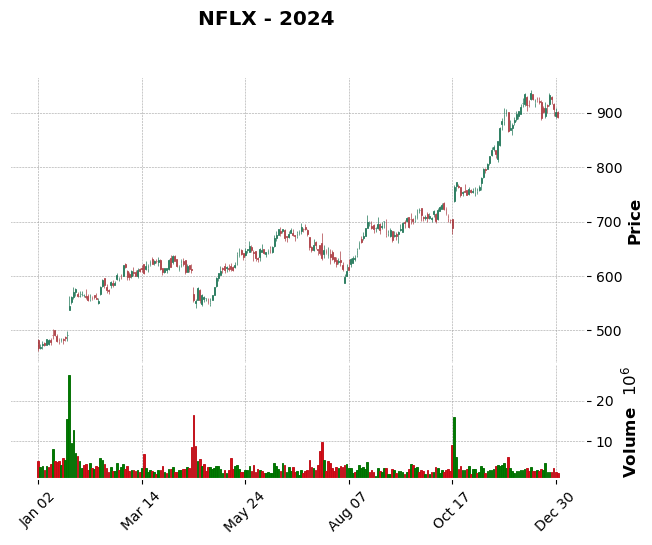

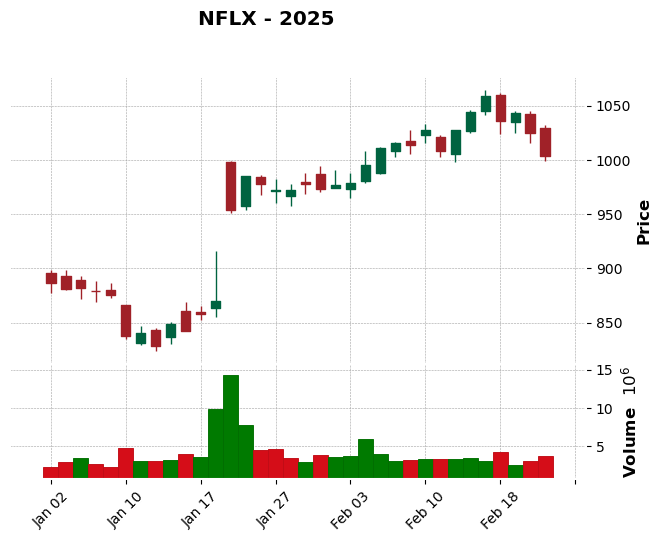

Yearly candlestick charts created and saved for each stock.


In [41]:
# Ensure 'Date' is a datetime type and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Plot yearly candlestick charts
for year in range(data.index.year.min(), data.index.year.max() + 1):
    yearly_data = data[data.index.year == year]
    if not yearly_data.empty:
        mpf.plot(yearly_data, type='candle', style='charles', title=f"{ticker} - {year}", ylabel='Price', volume=True)
        plt.close()

print("Yearly candlestick charts created and saved for each stock.")

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


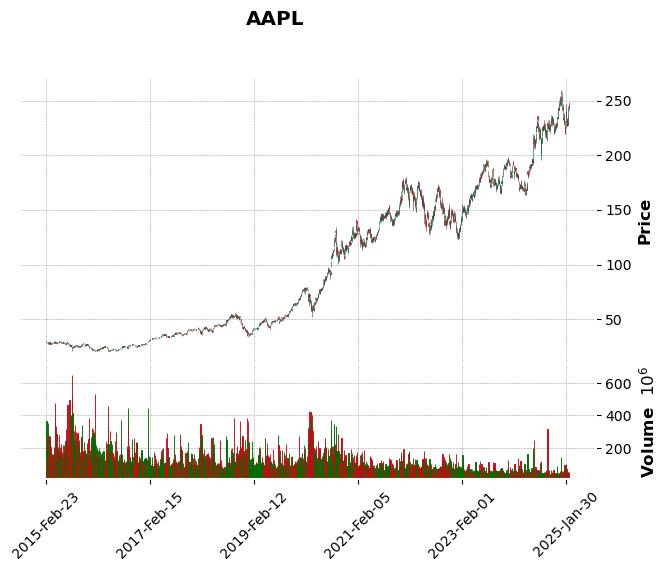

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


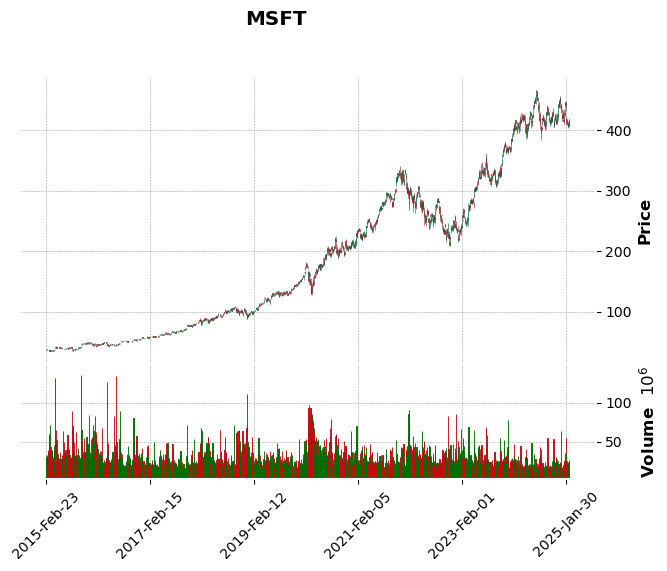

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


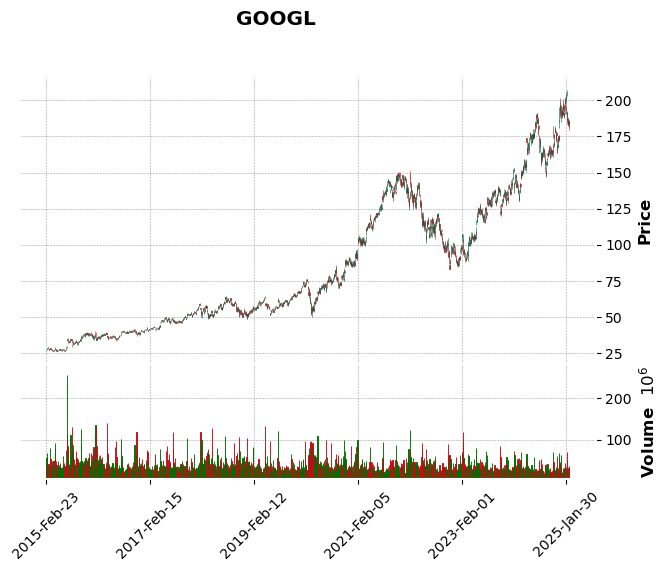

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


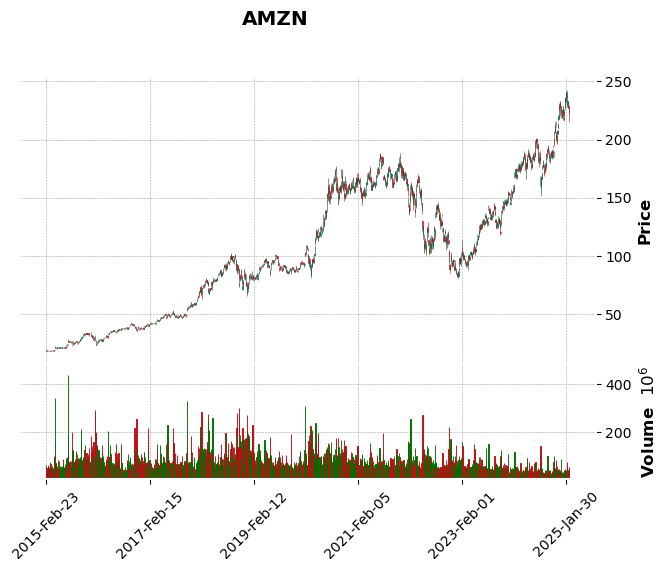

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


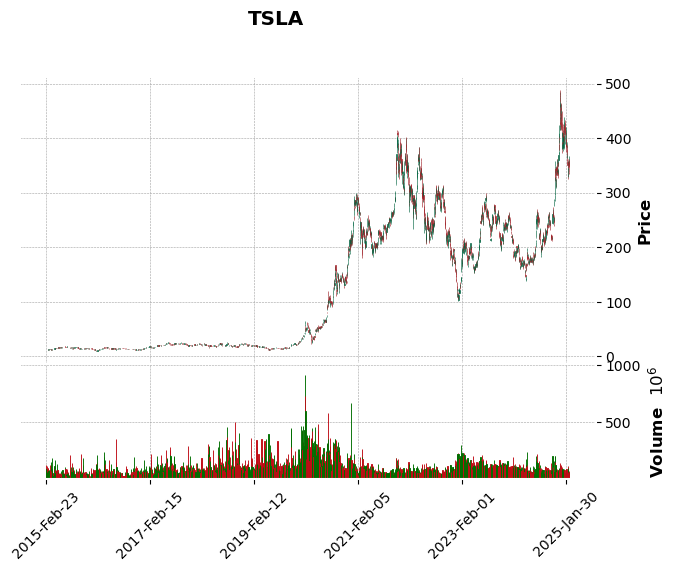

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


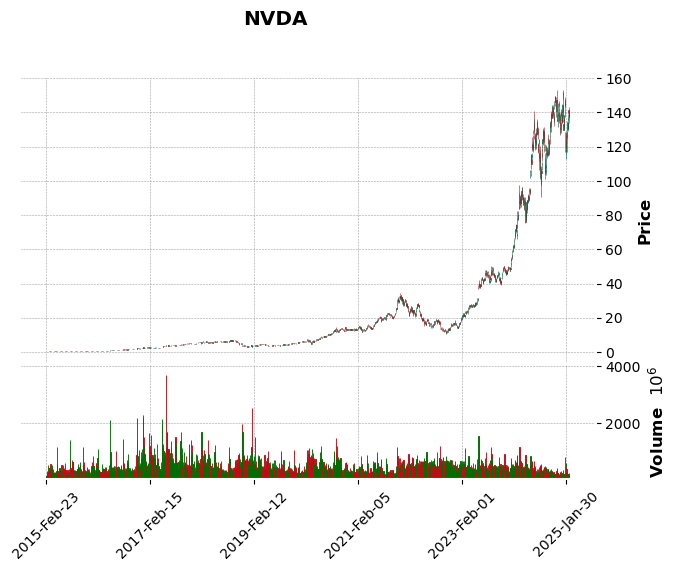

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


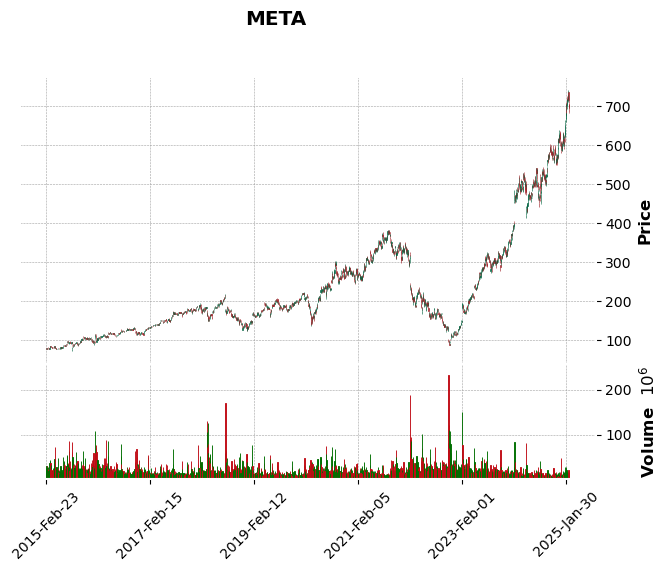

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


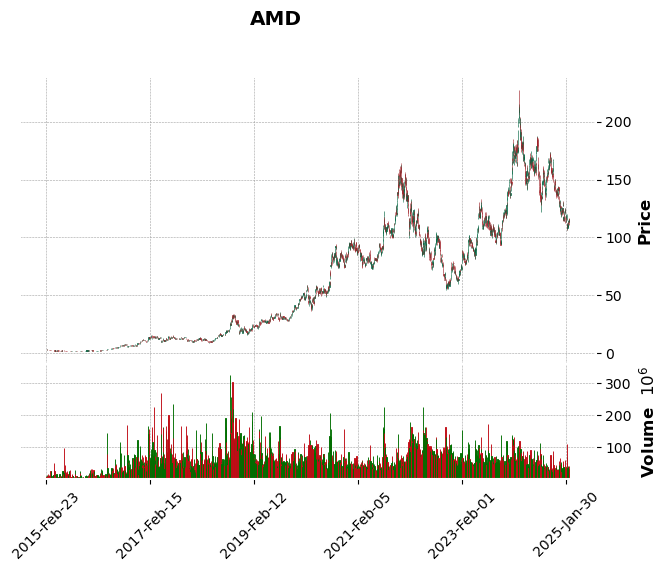

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


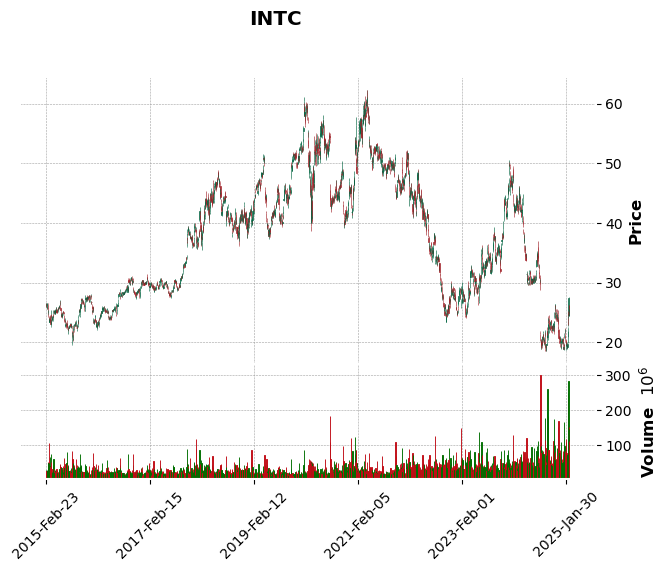

c:\Users\Owner\anaconda3\envs\dev\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


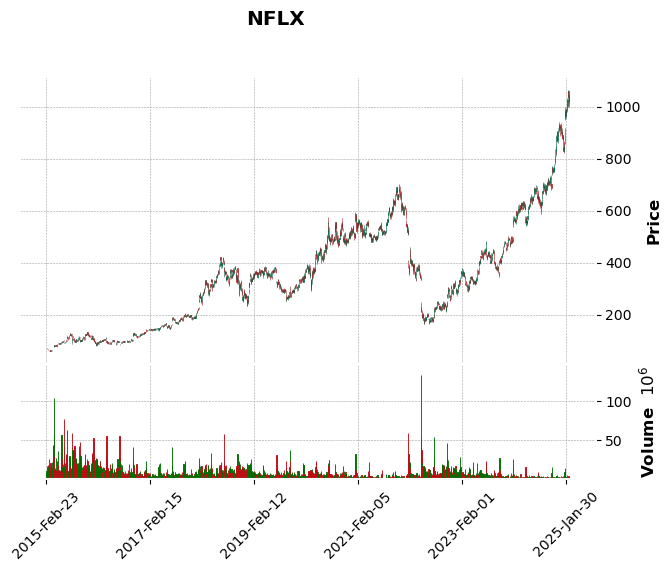

Candlestick charts created and saved for each stock.


In [42]:
# Fetch data from yfinance and create candlestick charts
for ticker in tech_stocks:
    # Fetch historical data
    stock = yf.Ticker(ticker)
    data = stock.history(period="10y")
    
    # Ensure 'Date' is the index
    data.reset_index(inplace=True)
    data.set_index("Date", inplace=True)
    
    # Create the candlestick chart
    mpf.plot(data, type='candle', style='charles', title=ticker, ylabel='Price', volume=True)
    
    # Save the chart as a PNG file
    plt.savefig(f"{ticker}_candlestick_chart.png")
    plt.close()

print("Candlestick charts created and saved for each stock.")


